<a href="https://colab.research.google.com/github/kr-nihcas/files/blob/main/Image_classification_Minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
 !pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.74 s (started: 2021-06-19 17:59:13 +00:00)


In [7]:
!pip install bing_image_downloader

time: 2.74 s (started: 2021-06-19 17:59:15 +00:00)


In [8]:
!mkdir datasets

mkdir: cannot create directory ‘datasets’: File exists
time: 118 ms (started: 2021-06-19 17:59:18 +00:00)


In [9]:
from bing_image_downloader import downloader
downloader.download("cricket ground",limit=60,output_dir='datasets',adult_filter_off='True')

[%] Downloading Images to /content/datasets/cricket ground


[!!]Indexing page: 1

[%] Indexed 60 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/cb/35/8d/cb358dcf2849ecb516fc1af424f49b18.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://michaeljones.co.uk/mj-content/uploads/2020/09/showcase04-1024x720.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/736x/ff/65/e6/ff65e6a074f6862bb3446005f740799f--true-facts-about-cricket.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/originals/6a/cd/53/6acd530897beda786a2d56e2044ef5d2.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Ventnor_Cricket_Ground.JPG/800px-Ventnor_Cricket_Ground.JPG
[%] File Downloaded !

[%] Downloading Image #6 from https://upload.wikimedia.org/wikipedia/commons/4/4c/Newclose_County_Cricket_Ground.JPG
[%] File Downloaded !

[%] Downloading Image #7 from

In [10]:
downloader.download("swimming pool",limit=60,output_dir='datasets',adult_filter_off='True')

[%] Downloading Images to /content/datasets/swimming pool


[!!]Indexing page: 1

[%] Indexed 60 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/ab/06/9a/ab069a7fe0411c4311d326cf08068f1b.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/736x/94/93/34/949334b9acaa3df266fc1199cd8d34f1.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/originals/47/04/7d/47047de296211ad3a03ad0e3b02d822d.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://published-assets.ari-build.com/Content/Published/Site/26240/hero/pool5.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/originals/3d/bc/5c/3dbc5c80e3654290d6e50880755e91b8.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://drewnowskipools.com/wp-content/uploads/2018/11/7G-True-L-Inground-Pool-Middletown-CT-800x500.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://published-assets.ari-build.com/Conte

In [11]:
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

time: 89.7 ms (started: 2021-06-19 18:00:58 +00:00)


In [12]:
target=[]
datasets=[]
flat_data=[]

time: 2.28 ms (started: 2021-06-19 18:00:59 +00:00)


In [13]:
DATADIR='/content/datasets'
CATEGORIES=['cricket ground','swimming pool']

for i in CATEGORIES:
    class_num=CATEGORIES.index(i)
    path=os.path.join(DATADIR,i)
    for j in os.listdir(path):
       img_array=imread(os.path.join(path,j))
       img_resized=resize(img_array,(150,150,3))
       flat_data.append(img_resized.flatten())
       datasets.append(img_resized)
       target.append(class_num)
flat_data=np.array(flat_data)
target=np.array(target)
datasets=np.array(datasets)       

time: 57.6 s (started: 2021-06-19 18:00:59 +00:00)


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=100)

time: 24.3 ms (started: 2021-06-19 18:01:56 +00:00)


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 3min 5s (started: 2021-06-19 18:01:56 +00:00)


In [16]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1])

time: 324 ms (started: 2021-06-19 18:05:02 +00:00)


In [17]:
y_test

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1])

time: 4.34 ms (started: 2021-06-19 18:05:02 +00:00)


In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.9047619047619048

time: 5.98 ms (started: 2021-06-19 18:05:02 +00:00)


In [19]:
confusion_matrix(y_pred,y_test)

array([[17,  3],
       [ 1, 21]])

time: 6.46 ms (started: 2021-06-19 18:05:02 +00:00)


In [20]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))#saving model in pickle file

time: 78.9 ms (started: 2021-06-19 18:05:02 +00:00)


In [21]:
model=pickle.load(open('img_model.p','rb'))

time: 23 ms (started: 2021-06-19 18:05:02 +00:00)


enter your URLhttps://economictimes.indiatimes.com/thumb/msid-76318134,width-1200,height-900,resizemode-4,imgsize-402949/untitled-4.jpg?from=mdr
(900, 1200, 3)
PREDICTED OUTPUT:swimming pool


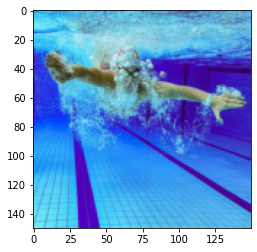

time: 59.7 s (started: 2021-06-19 18:05:02 +00:00)


In [22]:
flat_data=[]
url= input('enter your URL')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')

  
